# Make a Network

Use RBM to perform feature extraction on an image-based dataset that you find or create. If you go this route, present the features you extract and explain why this is a useful feature extraction method in the context you’re operating in. DO NOT USE either the MNIST digit recognition database or the iris data set. They’ve been worked on in very public ways very very many times and the code is easily available. (However, that code could be a useful resource to refer to)
<br>
### Data: <br>
Learning Multiple Layers of Features from Tiny Images, Alex Krizhevsky, 2009. <br>
https://www.cs.toronto.edu/~kriz/cifar.html

### References:
https://stackoverflow.com/questions/35995999/why-cifar-10-images-are-not-displayed-properly-using-matplotlib

https://www.tutorialspoint.com/dip/grayscale_to_rgb_conversion.htm
New grayscale image = ( (0.3 * R) + (0.59 * G) + (0.11 * B) )

Open multiple files
https://stackoverflow.com/questions/38991923/how-to-open-multiple-files-in-a-directory/38992988

In [98]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.base import clone

from sklearn.metrics import accuracy_score


In [12]:
f = open('cifar-10-batches-py/data_batch_1', 'rb')
datadict = pickle.load(f,encoding='latin1')
f.close()
X_train = datadict['data']
Y_train = datadict['labels']

In [68]:
f = open('cifar-10-batches-py/test_batch', 'rb')
datadict = pickle.load(f,encoding='latin1')
f.close()
X_test = datadict['data']
Y_test = datadict['labels']

In [72]:
Y_train_plane = Y_train
Y_train_plane = np.where(Y_train_plane == 0, 0, 1)
Y_train_plane[0:40]

Y_test_plane = np.array(Y_test)
Y_test_plane = np.where(Y_test_plane == 0, 0, 1)

In [27]:
X_train[0:2]

array([[ 59,  43,  50, ..., 140,  84,  72],
       [154, 126, 105, ..., 139, 142, 144]], dtype=uint8)

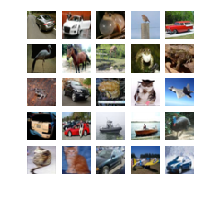

In [49]:
#Examples of cifar dataset
X_train2 = X_train.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
Y_train = np.array(Y_train)

#Visualizing CIFAR 10
fig, axes1 = plt.subplots(5,5,figsize=(3,3))
for j in range(5):
    for k in range(5):
        i = np.random.choice(range(len(X_train2)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(X_train2[i:i+1][0])
        

(10000, 3072)
(10000, 1024)


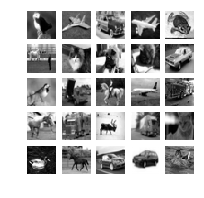

In [58]:
print(X_train.shape)

X_train_new = np.zeros((10000, 1024))
X_test_new = np.zeros((10000, 1024))


for i in range(0, 1024):
    X_train_new[:, i] = X_train[:, i]*.3 + X_train[:, i + 1024]*.59 + X_train[:, i + 2*1024]*.11
    X_test_new[:, i] = X_test[:, i]*.3 + X_test[:, i + 1024]*.59 + X_test[:, i + 2*1024]*.11
print(X_train_new.shape)

#Examples of cifar dataset
X_train_new2 = X_train_new.reshape(10000, 32, 32).astype("uint8")

#Visualizing CIFAR 10
fig, axes1 = plt.subplots(5,5,figsize=(3,3))
for j in range(5):
    for k in range(5):
        i = np.random.choice(range(len(X_train_new2)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(X_train_new2[i:i+1][0], cmap='gray')

In [22]:
# Models we will use
logistic = LogisticRegression(solver='lbfgs', max_iter=10000,
                                           multi_class='multinomial')
rbm = BernoulliRBM(random_state=0, verbose=True)

rbm.learning_rate = 0.06
rbm.n_iter = 12
# More components tend to give better prediction performance, but larger
# fitting time
rbm.n_components = 500
logistic.C = 1

rbm_features_classifier = Pipeline(
    steps=[('rbm', rbm), ('logistic', logistic)])

# Training RBM-Logistic Pipeline
rbm_features_classifier.fit(X_train_new, Y_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -26001075.71, time = 44.79s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -52074105.14, time = 45.09s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -78147189.35, time = 45.44s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -104220273.56, time = 45.03s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -130293357.77, time = 44.92s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -156366441.99, time = 45.49s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -182439526.20, time = 45.14s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -208512610.41, time = 45.12s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -234585694.62, time = 45.36s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -260658778.83, time = 44.14s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -286731863.04, time = 43.13s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -312804947.25, time = 44.07s


Pipeline(memory=None,
     steps=[('rbm', BernoulliRBM(batch_size=10, learning_rate=0.06, n_components=500, n_iter=12,
       random_state=0, verbose=True)), ('logistic', LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))])

In [23]:
y_pred = rbm_features_classifier.predict(X_test)

print(accuracy_score(Y_test, y_pred))

0.1


In [24]:
y_pred_train = rbm_features_classifier.predict(X_train)

print(accuracy_score(Y_train, y_pred_train))

0.1032


# Grayscale

In [54]:
# Models we will use
logistic = LogisticRegression(solver='lbfgs', max_iter=10000,
                                           multi_class='multinomial')
rbm = BernoulliRBM(random_state=0, verbose=True)

rbm.learning_rate = 0.06
rbm.n_iter = 12
# More components tend to give better prediction performance, but larger
# fitting time
rbm.n_components = 100
logistic.C = 1

rbm_features_classifier = Pipeline(
    steps=[('rbm', rbm), ('logistic', logistic)])

# Training RBM-Logistic Pipeline
rbm_features_classifier.fit(X_train_new, Y_train_plane)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -974202.57, time = 4.86s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -1948702.56, time = 3.84s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -2923202.56, time = 2.39s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -3897702.55, time = 2.44s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -4872202.55, time = 2.74s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -5846702.54, time = 5.43s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -6821202.54, time = 3.68s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -7795702.53, time = 2.44s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -8770202.52, time = 3.10s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -9744702.52, time = 5.69s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -10719202.51, time = 3.41s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -11693702.51, time = 2.40s


Pipeline(memory=None,
     steps=[('rbm', BernoulliRBM(batch_size=10, learning_rate=0.06, n_components=100, n_iter=12,
       random_state=0, verbose=True)), ('logistic', LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))])

In [63]:
Y_test_plane

array(1)

In [76]:
y_pred = rbm_features_classifier.predict(X_test_new)
y_pred_train = rbm_features_classifier.predict(X_train_new)

print(accuracy_score(Y_test_plane, y_pred))
print(accuracy_score(Y_train_plane, y_pred_train))

rbm.components_.shape

0.9
0.8995


(100, 1024)

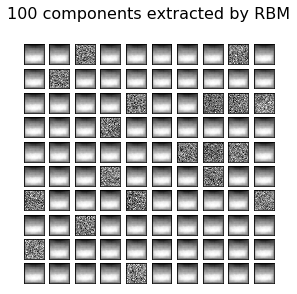

In [77]:
plt.figure(figsize=(4.2, 4))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((32, 32)), cmap=plt.cm.gray_r,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('100 components extracted by RBM', fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

plt.show()

# RBM just planes

In [142]:
Path = "cifar-10-batches-py/"
filelist = os.listdir(Path)
X_planes = []
Y_planes = []


for x in filelist:
    if x.startswith("data_batch_"):
        try:
            with open(Path + x, "rb") as f:
                datadict = pickle.load(f,encoding='latin1')
                f.close()
                X_temp = datadict['data']
                Y_temp = datadict['labels']
                print(X_temp.shape)
                X_planes.append(X_temp)  
                Y_planes.append(Y_temp)
                print(Y_temp.shape)
        except:
            pass


(10000, 3072)
(10000, 3072)
(10000, 3072)
(10000, 3072)
(10000, 3072)


In [143]:
X_planes = np.array(X_planes).reshape(50000, 3072)
Y_planes = np.array(Y_planes).reshape(-1)
Y_planes.shape

X_planes = X_planes[Y_planes == 0]
print(X_planes.shape)

X_planes_new = np.zeros((5000, 1024))


for i in range(0, 1024):
    X_planes_new[:, i] = X_planes[:, i]*.3 + X_planes[:, i + 1024]*.59 + X_planes[:, i + 2*1024]*.11

print(X_planes_new.shape)

(5000, 3072)
(5000, 1024)


In [152]:
rbm = BernoulliRBM(random_state=0, verbose=True)

rbm.learning_rate = 0.001

# More components tend to give better prediction performance, but larger
# fitting time
rbm.n_components = 100

# Training RBM-Logistic Pipeline
rbm.fit(X_planes_new)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -5612.50, time = 0.82s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -11228.12, time = 0.88s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -16843.75, time = 0.83s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -22459.38, time = 0.83s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -28075.01, time = 0.83s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -33690.64, time = 0.84s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -39306.26, time = 0.83s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -44921.89, time = 0.83s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -50537.52, time = 0.82s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -56153.15, time = 0.82s


BernoulliRBM(batch_size=10, learning_rate=0.001, n_components=100, n_iter=10,
       random_state=0, verbose=True)

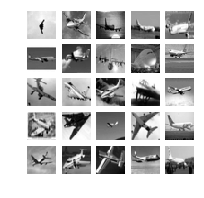

In [153]:
#Examples of cifar dataset
X_planes_new2 = X_planes_new.reshape(5000, 32, 32).astype("uint8")

#Visualizing CIFAR 10
fig, axes1 = plt.subplots(5,5,figsize=(3,3))
for j in range(5):
    for k in range(5):
        i = np.random.choice(range(len(X_planes_new2)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(X_planes_new2[i:i+1][0], cmap='gray')

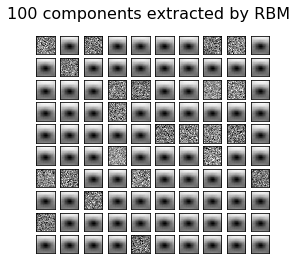

In [157]:
plt.figure(figsize=(4.2, 4))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((32, 32)), cmap='gray',
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('100 components extracted by RBM', fontsize=16)
#plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

plt.show()